# Creación de un modelo desde cero: nueva arquitectura y reducción de "ruido"

## Librerías necesarias

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [5]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

## Creación de los datasets específicos a partir de las carpetas 

In [6]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Nuevo modelo más profundo: el modelo tres

In [54]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 60, 60, 64)        184

## Entrenamiento y guardado de resultados del modelo tres

In [55]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model3/best_version",
 save_best_only=True,
 monitor="val_loss")
]

model3.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 131ms/step - loss: 4.0762 - accuracy: 0.0162 - val_loss: 4.0598 - val_accuracy: 0.0172
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 2/30
145/145 [==============================] - 20s 129ms/step - loss: 3.9751 - accuracy: 0.0263 - val_loss: 3.6167 - val_accuracy: 0.0422
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 3/30
145/145 [==============================] - 20s 130ms/step - loss: 3.6332 - accuracy: 0.0727 - val_loss: 3.2874 - val_accuracy: 0.1250
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 4/30
145/145 [==============================] - 20s 129ms/step - loss: 3.0730 - accuracy: 0.1697 - val_loss: 3.2652 - val_accuracy: 0.1509
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 5/30
145/145 [==============================] - 20s 130ms/step - loss: 2.5825 - accuracy: 0.2745 - val_loss: 2.5370 - val_accuracy: 0.2552
INFO:tensorflow:Assets writ

In [56]:
model3.save('model3/model')
np.save('model3/history.npy',history.history)

INFO:tensorflow:Assets written to: model3/model\assets


## Análisis de resultados

In [57]:
my_history1=np.load('model2/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3/history.npy',allow_pickle='TRUE').item()

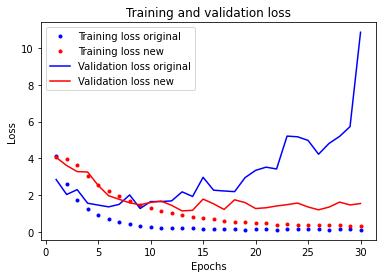

In [58]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

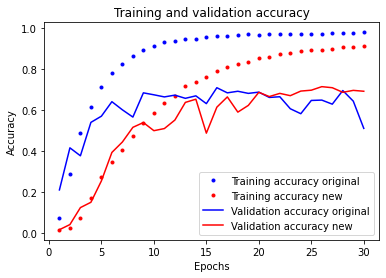

In [59]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model = keras.models.load_model('model3/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 77ms/step - loss: 1.7435 - accuracy: 0.6879


[1.7435424327850342, 0.6879310607910156]

In [61]:
model = keras.models.load_model('model3/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 80ms/step - loss: 1.2454 - accuracy: 0.6457


[1.2454142570495605, 0.6456896662712097]

## Modelo 3.1: modelo tres con tres capas densas al final

In [64]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_1 = keras.Model(inputs=inputs, outputs=outputs)

model3_1.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 60, 60, 64)        184

In [65]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model3_1/best_version",
 save_best_only=True,
 monitor="val_loss")
]

model3_1.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3_1.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 134ms/step - loss: 4.1226 - accuracy: 0.0230 - val_loss: 3.9401 - val_accuracy: 0.0569
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 2/30
145/145 [==============================] - 20s 131ms/step - loss: 3.7271 - accuracy: 0.0564 - val_loss: 4.8919 - val_accuracy: 0.0181
Epoch 3/30
145/145 [==============================] - 20s 132ms/step - loss: 3.3899 - accuracy: 0.1054 - val_loss: 3.1752 - val_accuracy: 0.1224
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 4/30
145/145 [==============================] - 20s 129ms/step - loss: 3.0601 - accuracy: 0.1597 - val_loss: 2.8804 - val_accuracy: 0.1974
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 5/30
145/145 [==============================] - 20s 130ms/step - loss: 2.7752 - accuracy: 0.2156 - val_loss: 2.5139 - val_accuracy: 0.2793
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 6/30
145/145 

In [66]:
model3_1.save('model3_1/model')
np.save('model3_1/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_1/model\assets


In [67]:
my_history1=np.load('model3/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_1/history.npy',allow_pickle='TRUE').item()

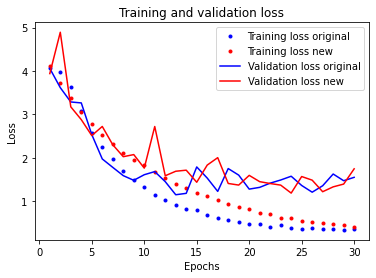

In [68]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

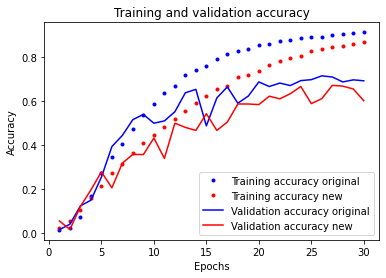

In [69]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model = keras.models.load_model('model3_1/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 73ms/step - loss: 1.4890 - accuracy: 0.6345


[1.4890308380126953, 0.634482741355896]

In [34]:
model = keras.models.load_model('model3_1/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 73ms/step - loss: 1.4009 - accuracy: 0.6578


[1.4009233713150024, 0.6577585935592651]

## Modelo 3.2: Una conexión residual

In [70]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1, strides=2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_2 = keras.Model(inputs=inputs, outputs=outputs)

model3_2.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_13 (Rescaling)        (None, 256, 256, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_137 (Conv2D)             (None, 254, 254, 16) 448         rescaling_13[0][0]               
__________________________________________________________________________________________________
max_pooling2d_60 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_137[0][0]                 
___________________________________________________________________________________________

In [71]:
model3_2.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3_2.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30
145/145 [==============================] - 22s 134ms/step - loss: 4.1324 - accuracy: 0.0153 - val_loss: 4.0761 - val_accuracy: 0.0431
Epoch 2/30
145/145 [==============================] - 20s 130ms/step - loss: 4.0978 - accuracy: 0.0208 - val_loss: 4.0419 - val_accuracy: 0.0276
Epoch 3/30
145/145 [==============================] - 20s 130ms/step - loss: 4.1352 - accuracy: 0.0296 - val_loss: 4.0484 - val_accuracy: 0.0241
Epoch 4/30
145/145 [==============================] - 20s 130ms/step - loss: 4.0979 - accuracy: 0.0337 - val_loss: 4.0250 - val_accuracy: 0.0379
Epoch 5/30
145/145 [==============================] - 20s 131ms/step - loss: 3.8307 - accuracy: 0.0649 - val_loss: 3.5732 - val_accuracy: 0.0767
Epoch 6/30
145/145 [==============================] - 20s 130ms/step - loss: 3.4671 - accuracy: 0.1170 - val_loss: 3.5286 - val_accuracy: 0.1060
Epoch 7/30
145/145 [==============================] - 20s 130ms/step - loss: 2.9332 - accuracy: 0.2246 - val_loss: 2.5239 - val_ac

In [74]:
model3_2.save('model3_2/model')
np.save('model3_2/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_2/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [75]:
my_history1=np.load('model3_1/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_2/history.npy',allow_pickle='TRUE').item()

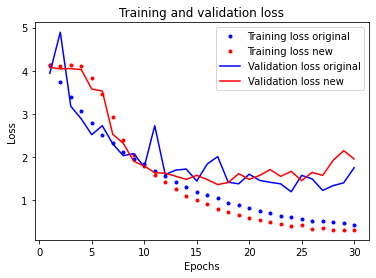

In [76]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

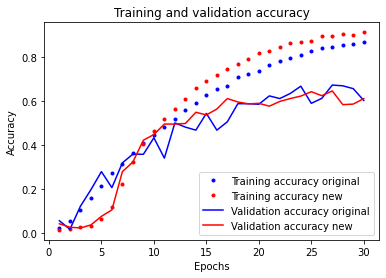

In [77]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
model = keras.models.load_model('model3_2/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 75ms/step - loss: 2.2541 - accuracy: 0.5776


[2.2541489601135254, 0.5775862336158752]

## Modelo 3.3: tres conexiones residuales

In [83]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_3 = keras.Model(inputs=inputs, outputs=outputs)

model3_3.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_16 (Rescaling)        (None, 256, 256, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_171 (Conv2D)             (None, 254, 254, 16) 448         rescaling_16[0][0]               
__________________________________________________________________________________________________
max_pooling2d_72 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_171[0][0]                 
___________________________________________________________________________________________

In [84]:
model3_3.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_3/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_3.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 134ms/step - loss: 4.4898 - accuracy: 0.0221 - val_loss: 4.0194 - val_accuracy: 0.0466
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 3.9273 - accuracy: 0.0568 - val_loss: 3.8361 - val_accuracy: 0.0733
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 3.2696 - accuracy: 0.1444 - val_loss: 2.8632 - val_accuracy: 0.2017
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 2.6787 - accuracy: 0.2559 - val_loss: 2.3562 - val_accuracy: 0.3069
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 2.3171 - accuracy: 0.3428 - val_loss: 2.3910 - val_accuracy: 0.3466
Epoch 6/30
145/145 [==============================] - 20s 131ms/step - loss: 1.9914 - accuracy: 0.4120 - val_loss: 2.5363 - val_accuracy: 0.2793
Epoch 7/30
145/145 [==============================] - 20s 133ms/step - loss: 1.7015 - accuracy: 0.4904 - val_loss: 1.7331 - val_accuracy: 0.4569
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 1.4764 - accuracy: 0.5489 - val_loss: 1.9720 - val_accuracy: 0.4319
Epoch 9/30
145/145 [==============================] - 20s 131ms/step - loss: 1.2913 - accuracy: 0.6031 - val_loss: 1.8703 - val_accuracy: 0.4690
Epoch 10/30
145/145 [==============================] - 20s 135ms/step - loss: 1.1226 - accuracy: 0.6473 - val_loss: 1.8063 - val_accuracy: 0.4776
Epoch 11/30
145/145 [==============================] - 21s 137ms/step - loss: 1.0138 - accuracy: 0.6820 - val_loss: 1.4693 - val_accuracy: 0.5319
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 12/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 137ms/step - loss: 0.8973 - accuracy: 0.7116 - val_loss: 1.7808 - val_accuracy: 0.5155
Epoch 13/30
145/145 [==============================] - 20s 129ms/step - loss: 0.7643 - accuracy: 0.7538 - val_loss: 1.6156 - val_accuracy: 0.5440
Epoch 14/30
145/145 [==============================] - 20s 129ms/step - loss: 0.7068 - accuracy: 0.7724 - val_loss: 1.5360 - val_accuracy: 0.5681
Epoch 15/30
145/145 [==============================] - 19s 127ms/step - loss: 0.6252 - accuracy: 0.7985 - val_loss: 1.4364 - val_accuracy: 0.5922
INFO:tensorflow:Assets written to: model3_3\best_version\assets
Epoch 16/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 125ms/step - loss: 0.5612 - accuracy: 0.8169 - val_loss: 1.4461 - val_accuracy: 0.6017
Epoch 17/30
145/145 [==============================] - 19s 125ms/step - loss: 0.5056 - accuracy: 0.8386 - val_loss: 1.5666 - val_accuracy: 0.6284
Epoch 18/30
145/145 [==============================] - 19s 125ms/step - loss: 0.4696 - accuracy: 0.8471 - val_loss: 1.6520 - val_accuracy: 0.5991
Epoch 19/30
145/145 [==============================] - 19s 124ms/step - loss: 0.4246 - accuracy: 0.8644 - val_loss: 1.9635 - val_accuracy: 0.5793
Epoch 20/30
145/145 [==============================] - 19s 127ms/step - loss: 0.4048 - accuracy: 0.8726 - val_loss: 1.7348 - val_accuracy: 0.6060
Epoch 21/30
145/145 [==============================] - 19s 125ms/step - loss: 0.3664 - accuracy: 0.8863 - val_loss: 2.3669 - val_accuracy: 0.5698
Epoch 22/30
145/145 [==============================] - 20s 131ms/step - loss: 0.3321 - accuracy: 0.8940 - val_loss: 1.7128 - val_accurac

In [85]:
model3_3.save('model3_3/model')
np.save('model3_3/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_3/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [86]:
my_history1=np.load('model3_2/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_3/history.npy',allow_pickle='TRUE').item()

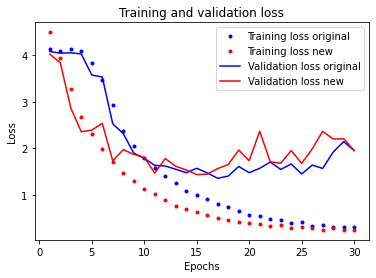

In [87]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

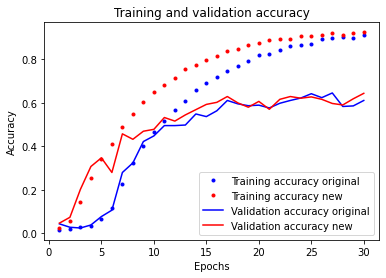

In [88]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Sin conexiones residuales vs 1 conexión vs 3 conexiones

In [171]:
my_history1=np.load('model3_1/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_2/history.npy',allow_pickle='TRUE').item()
my_history3=np.load('model3_3/history.npy',allow_pickle='TRUE').item()

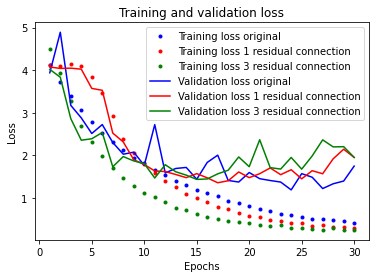

In [172]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]

loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]

loss_3 = my_history3["loss"]
val_loss_3 = my_history3["val_loss"]

epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss 1 residual connection")
plt.plot(epochs, loss_3, "g.", label="Training loss 3 residual connection")


plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss 1 residual connection")
plt.plot(epochs, val_loss_3, "g", label="Validation loss 3 residual connection")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

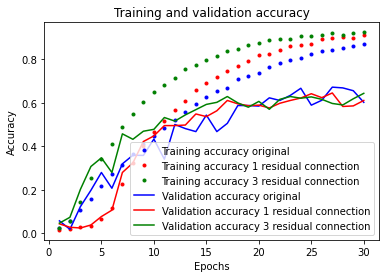

In [174]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]

acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]

acc_3 = my_history3["accuracy"]
val_acc_3 = my_history3["val_accuracy"]

epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy 1 residual connection")
plt.plot(epochs, acc_3, "g.", label="Training accuracy 3 residual connection")

plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy 1 residual connection")
plt.plot(epochs, val_acc_3, "g", label="Validation accuracy 3 residual connection")


plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [89]:
model = keras.models.load_model('model3_3/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 76ms/step - loss: 1.9691 - accuracy: 0.6457


[1.9690978527069092, 0.6456896662712097]

In [90]:
model = keras.models.load_model('model3_3/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 87ms/step - loss: 1.5237 - accuracy: 0.5836


[1.5237282514572144, 0.5836206674575806]

## Modelo 3.4: una capa convolucional menos

In [93]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_4 = keras.Model(inputs=inputs, outputs=outputs)

model3_4.summary()



Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_18 (Rescaling)        (None, 256, 256, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_194 (Conv2D)             (None, 254, 254, 16) 448         rescaling_18[0][0]               
__________________________________________________________________________________________________
max_pooling2d_80 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_194[0][0]                 
___________________________________________________________________________________________

In [94]:
model3_4.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_4/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_4.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 135ms/step - loss: 4.1097 - accuracy: 0.0167 - val_loss: 4.0596 - val_accuracy: 0.0138
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 4.1166 - accuracy: 0.0233 - val_loss: 4.6678 - val_accuracy: 0.0172
Epoch 3/30
145/145 [==============================] - 20s 132ms/step - loss: 3.5224 - accuracy: 0.1022 - val_loss: 3.3813 - val_accuracy: 0.1284
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 134ms/step - loss: 2.8983 - accuracy: 0.2216 - val_loss: 2.8719 - val_accuracy: 0.1914
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 134ms/step - loss: 2.3364 - accuracy: 0.3337 - val_loss: 2.6444 - val_accuracy: 0.2483
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 6/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 136ms/step - loss: 1.9470 - accuracy: 0.4370 - val_loss: 1.9102 - val_accuracy: 0.4302
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 1.6166 - accuracy: 0.5213 - val_loss: 1.6791 - val_accuracy: 0.4836
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 1.3680 - accuracy: 0.5739 - val_loss: 1.4094 - val_accuracy: 0.5647
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 9/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 1.1753 - accuracy: 0.6337 - val_loss: 1.4293 - val_accuracy: 0.5509
Epoch 10/30
145/145 [==============================] - 20s 132ms/step - loss: 0.9812 - accuracy: 0.6970 - val_loss: 1.4308 - val_accuracy: 0.5741
Epoch 11/30
145/145 [==============================] - 20s 132ms/step - loss: 0.8658 - accuracy: 0.7287 - val_loss: 1.3224 - val_accuracy: 0.5983
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 12/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 0.7655 - accuracy: 0.7580 - val_loss: 1.1973 - val_accuracy: 0.6397
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 13/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 0.6660 - accuracy: 0.7906 - val_loss: 1.6751 - val_accuracy: 0.5724
Epoch 14/30
145/145 [==============================] - 20s 132ms/step - loss: 0.5468 - accuracy: 0.8284 - val_loss: 1.3119 - val_accuracy: 0.6397
Epoch 15/30
145/145 [==============================] - 20s 132ms/step - loss: 0.5353 - accuracy: 0.8360 - val_loss: 1.2684 - val_accuracy: 0.6784
Epoch 16/30
145/145 [==============================] - 20s 132ms/step - loss: 0.4534 - accuracy: 0.8606 - val_loss: 1.1965 - val_accuracy: 0.6500
INFO:tensorflow:Assets written to: model3_4\best_version\assets
Epoch 17/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 0.4214 - accuracy: 0.8725 - val_loss: 1.3287 - val_accuracy: 0.6569
Epoch 18/30
145/145 [==============================] - 20s 131ms/step - loss: 0.3573 - accuracy: 0.8864 - val_loss: 1.5913 - val_accuracy: 0.6397
Epoch 19/30
145/145 [==============================] - 21s 136ms/step - loss: 0.3485 - accuracy: 0.8982 - val_loss: 1.8132 - val_accuracy: 0.5991
Epoch 20/30
145/145 [==============================] - 20s 132ms/step - loss: 0.3183 - accuracy: 0.9016 - val_loss: 1.8116 - val_accuracy: 0.6164
Epoch 21/30
145/145 [==============================] - 20s 132ms/step - loss: 0.2941 - accuracy: 0.9099 - val_loss: 1.8553 - val_accuracy: 0.6129
Epoch 22/30
145/145 [==============================] - 20s 132ms/step - loss: 0.3120 - accuracy: 0.9081 - val_loss: 1.4520 - val_accuracy: 0.6733
Epoch 23/30
145/145 [==============================] - 20s 133ms/step - loss: 0.2550 - accuracy: 0.9206 - val_loss: 1.4887 - val_accurac

In [95]:
model3_4.save('model3_4/model')
np.save('model3_4/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_4/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [96]:
my_history1=np.load('model3_3/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_4/history.npy',allow_pickle='TRUE').item()

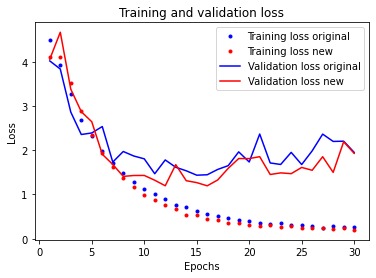

In [97]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

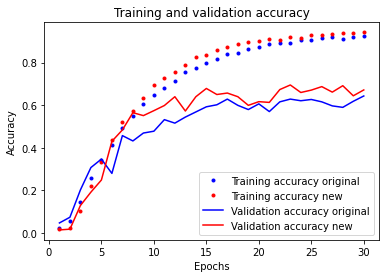

In [98]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
model = keras.models.load_model('model3_4/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 79ms/step - loss: 1.9347 - accuracy: 0.6595


[1.934747338294983, 0.6594827771186829]

In [100]:
model = keras.models.load_model('model3_4/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 81ms/step - loss: 1.2573 - accuracy: 0.6552


[1.2573282718658447, 0.6551724076271057]

## Modelo 3.5: capa maxpooling antes de las capas densas

In [101]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_5 = keras.Model(inputs=inputs, outputs=outputs)

model3_5.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_19 (Rescaling)        (None, 256, 256, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 254, 254, 16) 448         rescaling_19[0][0]               
__________________________________________________________________________________________________
max_pooling2d_84 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_205[0][0]                 
___________________________________________________________________________________________

In [102]:
model3_5.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_5/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_5.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 133ms/step - loss: 4.0974 - accuracy: 0.0216 - val_loss: 4.0358 - val_accuracy: 0.0190
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 3.9241 - accuracy: 0.0510 - val_loss: 3.3644 - val_accuracy: 0.1017
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 133ms/step - loss: 3.3259 - accuracy: 0.1249 - val_loss: 4.4969 - val_accuracy: 0.0828
Epoch 4/30
145/145 [==============================] - 20s 133ms/step - loss: 2.8933 - accuracy: 0.2120 - val_loss: 2.6003 - val_accuracy: 0.2888
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 2.5060 - accuracy: 0.2931 - val_loss: 2.6182 - val_accuracy: 0.2707
Epoch 6/30
145/145 [==============================] - 20s 132ms/step - loss: 2.1810 - accuracy: 0.3628 - val_loss: 2.0209 - val_accuracy: 0.4043
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 135ms/step - loss: 1.8930 - accuracy: 0.4355 - val_loss: 1.8104 - val_accuracy: 0.4578
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 133ms/step - loss: 1.6881 - accuracy: 0.4875 - val_loss: 1.8644 - val_accuracy: 0.4216
Epoch 9/30
145/145 [==============================] - 20s 132ms/step - loss: 1.4997 - accuracy: 0.5427 - val_loss: 1.6178 - val_accuracy: 0.5095
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 10/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 133ms/step - loss: 1.3373 - accuracy: 0.5885 - val_loss: 1.4725 - val_accuracy: 0.5621
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 11/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 1.1823 - accuracy: 0.6315 - val_loss: 1.8975 - val_accuracy: 0.4940
Epoch 12/30
145/145 [==============================] - 20s 132ms/step - loss: 1.0574 - accuracy: 0.6662 - val_loss: 1.8922 - val_accuracy: 0.4862
Epoch 13/30
145/145 [==============================] - 20s 132ms/step - loss: 0.9523 - accuracy: 0.6987 - val_loss: 1.1814 - val_accuracy: 0.6440
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 14/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 0.8607 - accuracy: 0.7318 - val_loss: 2.5692 - val_accuracy: 0.4103
Epoch 15/30
145/145 [==============================] - 20s 132ms/step - loss: 0.7803 - accuracy: 0.7520 - val_loss: 1.0982 - val_accuracy: 0.6655
INFO:tensorflow:Assets written to: model3_5\best_version\assets
Epoch 16/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 0.6966 - accuracy: 0.7738 - val_loss: 1.1666 - val_accuracy: 0.6483
Epoch 17/30
145/145 [==============================] - 20s 133ms/step - loss: 0.6189 - accuracy: 0.7983 - val_loss: 1.2397 - val_accuracy: 0.6491
Epoch 18/30
145/145 [==============================] - 20s 131ms/step - loss: 0.5599 - accuracy: 0.8189 - val_loss: 1.1040 - val_accuracy: 0.6931
Epoch 19/30
145/145 [==============================] - 20s 132ms/step - loss: 0.5605 - accuracy: 0.8254 - val_loss: 1.1612 - val_accuracy: 0.6440
Epoch 20/30
145/145 [==============================] - 20s 130ms/step - loss: 0.4735 - accuracy: 0.8439 - val_loss: 1.1755 - val_accuracy: 0.6733
Epoch 21/30
145/145 [==============================] - 20s 135ms/step - loss: 0.4601 - accuracy: 0.8520 - val_loss: 1.2259 - val_accuracy: 0.6733
Epoch 22/30
145/145 [==============================] - 20s 131ms/step - loss: 0.4244 - accuracy: 0.8641 - val_loss: 1.1662 - val_accurac

In [103]:
 model3_5.save('model3_5/model')
np.save('model3_5/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_5/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [104]:
my_history1=np.load('model3_4/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_5/history.npy',allow_pickle='TRUE').item()

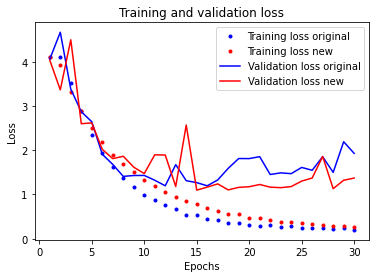

In [105]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

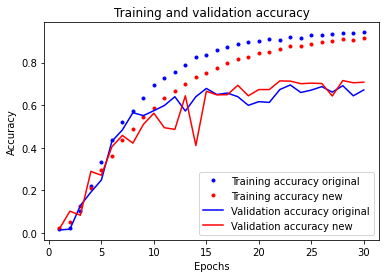

In [106]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [107]:
model = keras.models.load_model('model3_5/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 76ms/step - loss: 1.2802 - accuracy: 0.7233


[1.280187964439392, 0.7232758402824402]

In [108]:
model = keras.models.load_model('model3_5/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 81ms/step - loss: 1.0476 - accuracy: 0.6776


[1.0475761890411377, 0.6775861978530884]

## Modelo 3.6: modelo 3.3 con maxpooling antes de las capas densas

In [109]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_6 = keras.Model(inputs=inputs, outputs=outputs)

model3_6.summary()

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_20 (Rescaling)        (None, 256, 256, 3)  0           input_21[0][0]                   
__________________________________________________________________________________________________
conv2d_216 (Conv2D)             (None, 254, 254, 16) 448         rescaling_20[0][0]               
__________________________________________________________________________________________________
max_pooling2d_89 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_216[0][0]                 
___________________________________________________________________________________________

In [110]:
model3_6.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_6/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_6.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 135ms/step - loss: 4.2153 - accuracy: 0.0193 - val_loss: 3.9744 - val_accuracy: 0.0431
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 3.8483 - accuracy: 0.0426 - val_loss: 3.4019 - val_accuracy: 0.0681
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 3.4098 - accuracy: 0.1059 - val_loss: 3.0809 - val_accuracy: 0.1612
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 2.8809 - accuracy: 0.2048 - val_loss: 2.8744 - val_accuracy: 0.1888
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 2.5083 - accuracy: 0.2809 - val_loss: 2.2640 - val_accuracy: 0.3276
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 6/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 2.2273 - accuracy: 0.3403 - val_loss: 2.1319 - val_accuracy: 0.3543
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 2.0097 - accuracy: 0.4005 - val_loss: 1.9801 - val_accuracy: 0.4069
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 1.8185 - accuracy: 0.4503 - val_loss: 1.7845 - val_accuracy: 0.4543
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 9/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 133ms/step - loss: 1.6322 - accuracy: 0.4954 - val_loss: 1.8280 - val_accuracy: 0.4440
Epoch 10/30
145/145 [==============================] - 20s 132ms/step - loss: 1.4951 - accuracy: 0.5397 - val_loss: 1.4935 - val_accuracy: 0.5353
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 11/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 1.3672 - accuracy: 0.5804 - val_loss: 1.3863 - val_accuracy: 0.5716
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 12/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 1.2180 - accuracy: 0.6168 - val_loss: 1.5705 - val_accuracy: 0.5302
Epoch 13/30
145/145 [==============================] - 20s 131ms/step - loss: 1.1621 - accuracy: 0.6415 - val_loss: 1.3781 - val_accuracy: 0.5793
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 14/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 1.0245 - accuracy: 0.6726 - val_loss: 1.2972 - val_accuracy: 0.5647
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 15/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 132ms/step - loss: 0.9328 - accuracy: 0.7015 - val_loss: 1.4503 - val_accuracy: 0.5802
Epoch 16/30
145/145 [==============================] - 20s 132ms/step - loss: 0.8594 - accuracy: 0.7199 - val_loss: 1.3547 - val_accuracy: 0.6009
Epoch 17/30
145/145 [==============================] - 20s 131ms/step - loss: 0.7991 - accuracy: 0.7404 - val_loss: 1.0990 - val_accuracy: 0.6491
INFO:tensorflow:Assets written to: model3_6\best_version\assets
Epoch 18/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 131ms/step - loss: 0.7246 - accuracy: 0.7638 - val_loss: 1.3523 - val_accuracy: 0.6190
Epoch 19/30
145/145 [==============================] - 20s 131ms/step - loss: 0.6665 - accuracy: 0.7816 - val_loss: 1.1553 - val_accuracy: 0.6664
Epoch 20/30
145/145 [==============================] - 20s 131ms/step - loss: 0.6345 - accuracy: 0.7922 - val_loss: 1.1830 - val_accuracy: 0.6526
Epoch 21/30
145/145 [==============================] - 20s 132ms/step - loss: 0.5816 - accuracy: 0.8156 - val_loss: 1.3516 - val_accuracy: 0.6371
Epoch 22/30
145/145 [==============================] - 20s 133ms/step - loss: 0.5327 - accuracy: 0.8264 - val_loss: 1.1806 - val_accuracy: 0.6888
Epoch 23/30
145/145 [==============================] - 20s 131ms/step - loss: 0.5086 - accuracy: 0.8339 - val_loss: 1.1394 - val_accuracy: 0.6810
Epoch 24/30
145/145 [==============================] - 20s 132ms/step - loss: 0.4722 - accuracy: 0.8512 - val_loss: 1.1392 - val_accurac

In [111]:
model3_6.save('model3_6/model')
np.save('model3_6/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_6/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [112]:
my_history1=np.load('model3_5/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_6/history.npy',allow_pickle='TRUE').item()

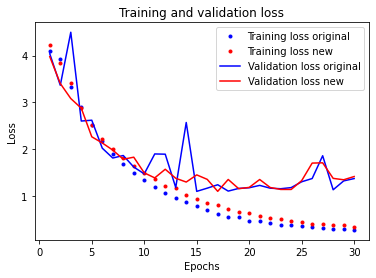

In [113]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

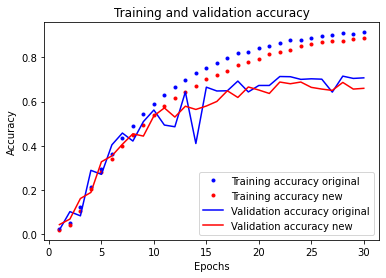

In [114]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
model = keras.models.load_model('model3_6/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 76ms/step - loss: 1.3054 - accuracy: 0.6724


[1.305406928062439, 0.6724137663841248]

In [116]:
model = keras.models.load_model('model3_6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 82ms/step - loss: 1.1043 - accuracy: 0.6509


[1.1042773723602295, 0.6508620977401733]

## Modelo 3.7: modelo 3.6 con conexiones residuales completas

In [7]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_7 = keras.Model(inputs=inputs, outputs=outputs)

model3_7.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 254, 254, 16) 448         rescaling[0][0]                  
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 127, 127, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [118]:
model3_7.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_7/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_7.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 24s 134ms/step - loss: 4.1573 - accuracy: 0.0337 - val_loss: 3.5732 - val_accuracy: 0.0621
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 125ms/step - loss: 3.3311 - accuracy: 0.1420 - val_loss: 3.1421 - val_accuracy: 0.1371
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 134ms/step - loss: 2.6754 - accuracy: 0.2568 - val_loss: 2.6730 - val_accuracy: 0.2638
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 142ms/step - loss: 2.2540 - accuracy: 0.3641 - val_loss: 2.0273 - val_accuracy: 0.4026
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 139ms/step - loss: 1.9247 - accuracy: 0.4414 - val_loss: 1.8682 - val_accuracy: 0.4543
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 6/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 139ms/step - loss: 1.6296 - accuracy: 0.5115 - val_loss: 1.6148 - val_accuracy: 0.5121
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 140ms/step - loss: 1.3658 - accuracy: 0.5797 - val_loss: 1.6357 - val_accuracy: 0.4974
Epoch 8/30
145/145 [==============================] - 22s 142ms/step - loss: 1.1988 - accuracy: 0.6305 - val_loss: 1.3677 - val_accuracy: 0.5716
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 9/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 144ms/step - loss: 1.0630 - accuracy: 0.6685 - val_loss: 1.2139 - val_accuracy: 0.6147
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 10/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 144ms/step - loss: 0.9465 - accuracy: 0.7073 - val_loss: 1.1958 - val_accuracy: 0.6526
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 11/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 144ms/step - loss: 0.8168 - accuracy: 0.7453 - val_loss: 1.3944 - val_accuracy: 0.5914
Epoch 12/30
145/145 [==============================] - 22s 143ms/step - loss: 0.7372 - accuracy: 0.7723 - val_loss: 1.2388 - val_accuracy: 0.6457
Epoch 13/30
145/145 [==============================] - 22s 143ms/step - loss: 0.6308 - accuracy: 0.7970 - val_loss: 1.1242 - val_accuracy: 0.6793
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 14/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 142ms/step - loss: 0.5698 - accuracy: 0.8130 - val_loss: 1.2504 - val_accuracy: 0.6750
Epoch 15/30
145/145 [==============================] - 22s 143ms/step - loss: 0.5020 - accuracy: 0.8362 - val_loss: 1.3817 - val_accuracy: 0.6345
Epoch 16/30
145/145 [==============================] - 22s 142ms/step - loss: 0.4435 - accuracy: 0.8540 - val_loss: 1.0905 - val_accuracy: 0.7103
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 17/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 143ms/step - loss: 0.4186 - accuracy: 0.8652 - val_loss: 1.0258 - val_accuracy: 0.7121
INFO:tensorflow:Assets written to: model3_7\best_version\assets
Epoch 18/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 22s 143ms/step - loss: 0.3896 - accuracy: 0.8776 - val_loss: 1.2706 - val_accuracy: 0.6621
Epoch 19/30
145/145 [==============================] - 21s 141ms/step - loss: 0.3610 - accuracy: 0.8824 - val_loss: 1.0851 - val_accuracy: 0.7371
Epoch 20/30
145/145 [==============================] - 22s 142ms/step - loss: 0.3409 - accuracy: 0.8916 - val_loss: 1.2541 - val_accuracy: 0.7034
Epoch 21/30
145/145 [==============================] - 22s 145ms/step - loss: 0.3334 - accuracy: 0.8963 - val_loss: 1.3160 - val_accuracy: 0.7069
Epoch 22/30
145/145 [==============================] - 22s 142ms/step - loss: 0.3047 - accuracy: 0.9064 - val_loss: 1.1636 - val_accuracy: 0.7233
Epoch 23/30
145/145 [==============================] - 21s 138ms/step - loss: 0.2961 - accuracy: 0.9084 - val_loss: 1.9536 - val_accuracy: 0.6353
Epoch 24/30
145/145 [==============================] - 21s 140ms/step - loss: 0.2847 - accuracy: 0.9131 - val_loss: 1.5492 - val_accurac

In [119]:
model3_7.save('model3_7/model')
np.save('model3_7/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_7/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [120]:
my_history1=np.load('model3_6/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_7/history.npy',allow_pickle='TRUE').item()

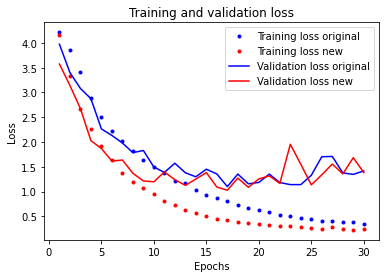

In [121]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

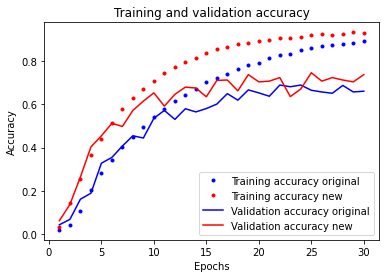

In [122]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
model = keras.models.load_model('model3_7/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 80ms/step - loss: 1.5573 - accuracy: 0.7207


[1.5572614669799805, 0.7206896543502808]

In [124]:
model = keras.models.load_model('model3_7/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 90ms/step - loss: 1.2040 - accuracy: 0.6931


[1.2039934396743774, 0.6931034326553345]

## Modelo 3.8: conexiones residuales completas y mayor profundidad

In [ ]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(512, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_8 = keras.Model(inputs=inputs, outputs=outputs)

model3_8.summary()

In [ ]:
model3_8.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_8/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_8.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model3_8.save('model3_8/model')
np.save('model3_8/history.npy',history.history)

In [ ]:
my_history1=np.load('model3_7/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_8/history.npy',allow_pickle='TRUE').item()

In [ ]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model('model3_8/model')
results= model.evaluate(test_dataset)
results

In [ ]:
model = keras.models.load_model('model3_8/best_version')
results= model.evaluate(test_dataset)
results

## Modelo 3.9: eliminación de capas densas

In [ ]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(512, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_9 = keras.Model(inputs=inputs, outputs=outputs)

model3_9.summary()

In [ ]:
model3_9.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_9/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_9.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model3_9.save('model3_9/model')
np.save('model3_9/history.npy',history.history)

In [ ]:
my_history1=np.load('model3_8/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_9/history.npy',allow_pickle='TRUE').item()

In [ ]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model('model3_9/model')
results= model.evaluate(test_dataset)
results

In [ ]:
model = keras.models.load_model('model3_9/best_version')
results= model.evaluate(test_dataset)
results

## Modelo 3.10: capas densas más grandes

In [ ]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(512, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_10 = keras.Model(inputs=inputs, outputs=outputs)

model3_10.summary()

In [42]:
model3_10.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_10/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_10.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 24s 146ms/step - loss: 4.4896 - accuracy: 0.0256 - val_loss: 3.9835 - val_accuracy: 0.0362
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 134ms/step - loss: 4.4180 - accuracy: 0.0267 - val_loss: 3.9785 - val_accuracy: 0.0319
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 21s 136ms/step - loss: 3.9139 - accuracy: 0.0733 - val_loss: 3.9667 - val_accuracy: 0.0569
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 125ms/step - loss: 3.1512 - accuracy: 0.1553 - val_loss: 2.9337 - val_accuracy: 0.1957
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 121ms/step - loss: 2.5757 - accuracy: 0.2716 - val_loss: 2.0068 - val_accuracy: 0.4155
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 6/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 120ms/step - loss: 2.1559 - accuracy: 0.3707 - val_loss: 2.1333 - val_accuracy: 0.3897
Epoch 7/30
145/145 [==============================] - 18s 121ms/step - loss: 1.8525 - accuracy: 0.4477 - val_loss: 1.5741 - val_accuracy: 0.5233
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 121ms/step - loss: 1.5355 - accuracy: 0.5295 - val_loss: 1.3458 - val_accuracy: 0.5836
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 9/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 124ms/step - loss: 1.3273 - accuracy: 0.5894 - val_loss: 1.2438 - val_accuracy: 0.5983
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 10/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 126ms/step - loss: 1.1305 - accuracy: 0.6462 - val_loss: 1.3068 - val_accuracy: 0.6069
Epoch 11/30
145/145 [==============================] - 19s 125ms/step - loss: 0.9838 - accuracy: 0.6889 - val_loss: 1.2537 - val_accuracy: 0.6052
Epoch 12/30
145/145 [==============================] - 19s 125ms/step - loss: 0.8643 - accuracy: 0.7181 - val_loss: 1.2168 - val_accuracy: 0.6319
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 13/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 124ms/step - loss: 0.7439 - accuracy: 0.7641 - val_loss: 1.1296 - val_accuracy: 0.6655
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 14/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 125ms/step - loss: 0.6756 - accuracy: 0.7871 - val_loss: 1.1069 - val_accuracy: 0.6828
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 15/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 120ms/step - loss: 0.6032 - accuracy: 0.8068 - val_loss: 0.9498 - val_accuracy: 0.7060
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 16/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 121ms/step - loss: 0.5190 - accuracy: 0.8394 - val_loss: 2.3054 - val_accuracy: 0.4595
Epoch 17/30
145/145 [==============================] - 18s 121ms/step - loss: 0.5026 - accuracy: 0.8347 - val_loss: 0.8900 - val_accuracy: 0.7397
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 18/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 128ms/step - loss: 0.4631 - accuracy: 0.8565 - val_loss: 0.8717 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 19/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 124ms/step - loss: 0.4395 - accuracy: 0.8656 - val_loss: 0.9946 - val_accuracy: 0.7422
Epoch 20/30
145/145 [==============================] - 19s 122ms/step - loss: 0.4311 - accuracy: 0.8712 - val_loss: 0.9124 - val_accuracy: 0.7612
Epoch 21/30
145/145 [==============================] - 19s 122ms/step - loss: 0.4245 - accuracy: 0.8763 - val_loss: 0.8112 - val_accuracy: 0.7647
INFO:tensorflow:Assets written to: model3_10\best_version\assets
Epoch 22/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 122ms/step - loss: 0.3942 - accuracy: 0.8833 - val_loss: 1.0926 - val_accuracy: 0.7491
Epoch 23/30
145/145 [==============================] - 19s 124ms/step - loss: 0.3947 - accuracy: 0.8889 - val_loss: 1.0409 - val_accuracy: 0.7552
Epoch 24/30
145/145 [==============================] - 19s 122ms/step - loss: 0.3475 - accuracy: 0.8973 - val_loss: 1.1874 - val_accuracy: 0.7517
Epoch 25/30
145/145 [==============================] - 19s 122ms/step - loss: 0.3710 - accuracy: 0.8995 - val_loss: 1.0960 - val_accuracy: 0.7569
Epoch 26/30
145/145 [==============================] - 19s 125ms/step - loss: 0.3978 - accuracy: 0.8997 - val_loss: 1.5487 - val_accuracy: 0.6793
Epoch 27/30
145/145 [==============================] - 19s 126ms/step - loss: 0.3636 - accuracy: 0.9045 - val_loss: 1.1820 - val_accuracy: 0.7569
Epoch 28/30
145/145 [==============================] - 19s 123ms/step - loss: 0.3490 - accuracy: 0.9059 - val_loss: 1.4109 - val_accurac

In [43]:
model3_10.save('model3_10/model')
np.save('model3_10/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_10/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [44]:
my_history1=np.load('model3_8/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_10/history.npy',allow_pickle='TRUE').item()

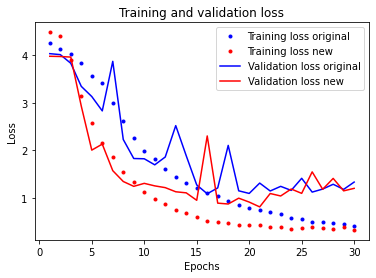

In [45]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

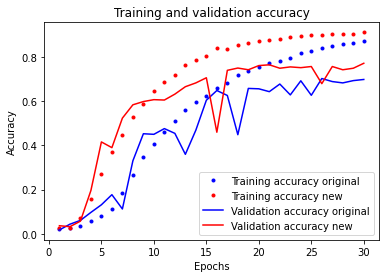

In [46]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model = keras.models.load_model('model3_10/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 68ms/step - loss: 1.2642 - accuracy: 0.7500


[1.2642438411712646, 0.75]

In [48]:
model = keras.models.load_model('model3_10/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 72ms/step - loss: 0.8960 - accuracy: 0.7647


[0.8960338830947876, 0.7646551728248596]

## Modelo 3.11: Modelo 3.5 con capa densa más grande

In [157]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_11 = keras.Model(inputs=inputs, outputs=outputs)

model3_11.summary()

Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_26 (Rescaling)        (None, 256, 256, 3)  0           input_27[0][0]                   
__________________________________________________________________________________________________
conv2d_299 (Conv2D)             (None, 254, 254, 16) 448         rescaling_26[0][0]               
__________________________________________________________________________________________________
max_pooling2d_122 (MaxPooling2D (None, 127, 127, 16) 0           conv2d_299[0][0]                 
___________________________________________________________________________________________

In [158]:
model3_11.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_11/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_11.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 19s 117ms/step - loss: 4.0975 - accuracy: 0.0194 - val_loss: 3.9901 - val_accuracy: 0.0284
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 117ms/step - loss: 3.9678 - accuracy: 0.0500 - val_loss: 3.8331 - val_accuracy: 0.0422
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 118ms/step - loss: 3.0843 - accuracy: 0.1829 - val_loss: 2.5666 - val_accuracy: 0.2595
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 117ms/step - loss: 2.3599 - accuracy: 0.3320 - val_loss: 1.9433 - val_accuracy: 0.4052
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 117ms/step - loss: 1.8492 - accuracy: 0.4585 - val_loss: 2.0541 - val_accuracy: 0.4147
Epoch 6/30
145/145 [==============================] - 18s 116ms/step - loss: 1.4381 - accuracy: 0.5635 - val_loss: 1.5821 - val_accuracy: 0.5216
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 118ms/step - loss: 1.1591 - accuracy: 0.6433 - val_loss: 1.2317 - val_accuracy: 0.6241
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 117ms/step - loss: 0.9419 - accuracy: 0.7039 - val_loss: 1.6285 - val_accuracy: 0.5448
Epoch 9/30
145/145 [==============================] - 18s 116ms/step - loss: 0.7591 - accuracy: 0.7624 - val_loss: 1.1579 - val_accuracy: 0.6638
INFO:tensorflow:Assets written to: model3_11\best_version\assets
Epoch 10/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 18s 117ms/step - loss: 0.6291 - accuracy: 0.7984 - val_loss: 1.1746 - val_accuracy: 0.6871
Epoch 11/30
145/145 [==============================] - 18s 116ms/step - loss: 0.5156 - accuracy: 0.8390 - val_loss: 1.2904 - val_accuracy: 0.6552
Epoch 12/30
145/145 [==============================] - 18s 117ms/step - loss: 0.4369 - accuracy: 0.8639 - val_loss: 1.3579 - val_accuracy: 0.6914
Epoch 13/30
145/145 [==============================] - 18s 117ms/step - loss: 0.3919 - accuracy: 0.8756 - val_loss: 1.2411 - val_accuracy: 0.6931
Epoch 14/30
145/145 [==============================] - 18s 117ms/step - loss: 0.3562 - accuracy: 0.8909 - val_loss: 1.2314 - val_accuracy: 0.6940
Epoch 15/30
145/145 [==============================] - 18s 117ms/step - loss: 0.3206 - accuracy: 0.9026 - val_loss: 1.6851 - val_accuracy: 0.6371
Epoch 16/30
145/145 [==============================] - 18s 117ms/step - loss: 0.2971 - accuracy: 0.9124 - val_loss: 1.3164 - val_accurac

In [159]:
model3_11.save('model3_11/model')
np.save('model3_11/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_11/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [160]:
my_history1=np.load('model3_5/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_11/history.npy',allow_pickle='TRUE').item()

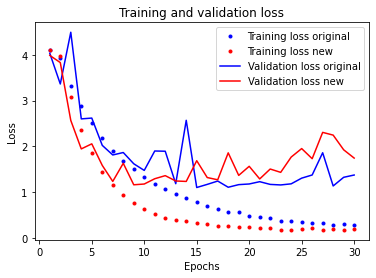

In [161]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

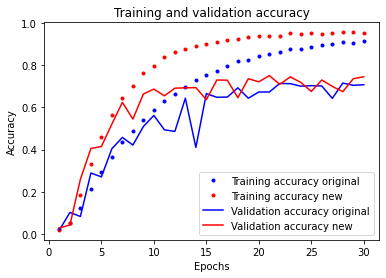

In [162]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [163]:
model = keras.models.load_model('model3_11/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 68ms/step - loss: 1.9713 - accuracy: 0.7181


[1.9712738990783691, 0.7181034684181213]

In [164]:
model = keras.models.load_model('model3_11/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 75ms/step - loss: 1.2499 - accuracy: 0.6491


[1.249870777130127, 0.6491379141807556]

## Modelo 3.12: Modelo 3.12 con conexiones residuales

In [166]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
residual = x
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_12 = keras.Model(inputs=inputs, outputs=outputs)

model3_12.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_28 (Rescaling)        (None, 256, 256, 3)  0           input_29[0][0]                   
__________________________________________________________________________________________________
conv2d_323 (Conv2D)             (None, 254, 254, 16) 448         rescaling_28[0][0]               
__________________________________________________________________________________________________
max_pooling2d_132 (MaxPooling2D (None, 127, 127, 16) 0           conv2d_323[0][0]                 
___________________________________________________________________________________________

In [167]:
model3_12.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model3_12/best_version",
    save_best_only=True,
    monitor="val_loss")
]

history = model3_12.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 21s 130ms/step - loss: 3.8796 - accuracy: 0.0855 - val_loss: 3.9963 - val_accuracy: 0.0991
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 2/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 125ms/step - loss: 2.6602 - accuracy: 0.2812 - val_loss: 2.2460 - val_accuracy: 0.3526
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 3/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 126ms/step - loss: 1.9757 - accuracy: 0.4393 - val_loss: 1.9692 - val_accuracy: 0.4259
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 4/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 124ms/step - loss: 1.4711 - accuracy: 0.5623 - val_loss: 1.4650 - val_accuracy: 0.5509
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 5/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 124ms/step - loss: 1.1292 - accuracy: 0.6536 - val_loss: 1.2979 - val_accuracy: 0.6000
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 6/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 129ms/step - loss: 0.9191 - accuracy: 0.7171 - val_loss: 1.1299 - val_accuracy: 0.6629
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 7/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 20s 134ms/step - loss: 0.6852 - accuracy: 0.7875 - val_loss: 0.9794 - val_accuracy: 0.7103
INFO:tensorflow:Assets written to: model3_12\best_version\assets
Epoch 8/30


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


145/145 [==============================] - 19s 127ms/step - loss: 0.5616 - accuracy: 0.8241 - val_loss: 1.2264 - val_accuracy: 0.6543
Epoch 9/30
145/145 [==============================] - 20s 135ms/step - loss: 0.4867 - accuracy: 0.8548 - val_loss: 1.1759 - val_accuracy: 0.6853
Epoch 10/30
145/145 [==============================] - 20s 134ms/step - loss: 0.3712 - accuracy: 0.8846 - val_loss: 1.0966 - val_accuracy: 0.7267
Epoch 11/30
145/145 [==============================] - 20s 135ms/step - loss: 0.3233 - accuracy: 0.9012 - val_loss: 1.3936 - val_accuracy: 0.7164
Epoch 12/30
145/145 [==============================] - 20s 132ms/step - loss: 0.2982 - accuracy: 0.9112 - val_loss: 1.3320 - val_accuracy: 0.7078
Epoch 13/30
145/145 [==============================] - 21s 137ms/step - loss: 0.2682 - accuracy: 0.9186 - val_loss: 1.3003 - val_accuracy: 0.7129
Epoch 14/30
145/145 [==============================] - 21s 138ms/step - loss: 0.2423 - accuracy: 0.9293 - val_loss: 1.3039 - val_accuracy

In [159]:
model3_12.save('model3_12/model')
np.save('model3_12/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_11/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [160]:
my_history1=np.load('model3_11/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_12/history.npy',allow_pickle='TRUE').item()

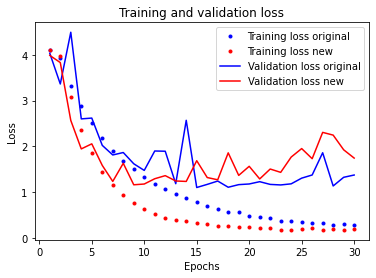

In [161]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

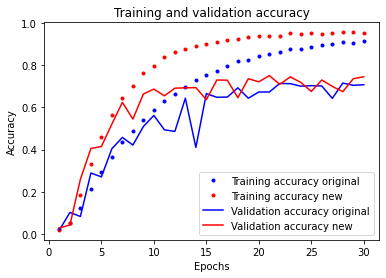

In [162]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [163]:
model = keras.models.load_model('model3_12/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 68ms/step - loss: 1.9713 - accuracy: 0.7181


[1.9712738990783691, 0.7181034684181213]

In [164]:
model = keras.models.load_model('model3_12/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 75ms/step - loss: 1.2499 - accuracy: 0.6491


[1.249870777130127, 0.6491379141807556]